<a href="https://colab.research.google.com/github/Ali623/practice/blob/master/deep_learning_with_python_Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2
### This chapter covers
- A first example of a neural network
- Tensors and tensor operations
- How neural networks learn via backpropagation
and gradient descent

We simple learn mathmatical concept and, know about tensor, tensor operation and neural network

## 2.1 A first look at a neural network


- Classification Problem Hand writing number (0 to 9) 28X28 pixels
- Use MNIST Data set
- See some MNIST samples in figure 2.1

#### Note on classes and labels
In machine learning, a category in a classification problem is called a class. Data
points are called samples. The class associated with a specific sample is called a
label.

# <img src="images/f2.1.png">

# Use Keras to solve above problem 

In [1]:
# 2.1
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


`mnist.load_data()` this function reuturn four values 
- train_data, train_labels (60% from all data)
- test_data, test_labels (40% from all data)


#### Our images convert in numpuy array with value of grayscale mode (R,G,B convert into GrayScale= R+G+B/3)
#### Labels are in 0 to 9

## About Train Data Details

In [2]:
print("Train Image Shape: ", train_images.shape)
print("Len of train labels:", len(train_labels))
train_labels

Train Image Shape:  (60000, 28, 28)
Len of train labels: 60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## About Test Data Details

In [3]:
print("Train Image Shape: ", test_images.shape)
print("Len of train labels:", len(test_labels))
test_labels

Train Image Shape:  (10000, 28, 28)
Len of train labels: 10000


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Lets Try to train our module 
- learn train label from train data
- predict label on test data then match with test data labels

## Listing 2.2 The network architecture

In [0]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

- core think in network is layer
- every layer work like filter where data through in layer and it comes out in more usefull form
-  layers extract representations out of the data fed into them
- deep learning consists of chaining together simple layers that will implement a form
of progressive data distillation.
- Deep learning model like a sieve for data processing, made of a succession of increasingly refined data filters 
- <b>our network consists of a sequence of two Dense layers,</b>  which are densely
connected (also called fully connected) neural layers. 
The second (and last) layer is a 10-way softmax layer, that return of 10 probility scores (suming to 1) each score probility the current digit image belong on of our 10 digit classes.

 To make the network ready for training, we need to pick three more things, as part
of the compilation step:
- loss function
- An optimizer
- Metrics to monitor during training and testing

## Listing 2.3 The compilation step


In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Before training, we’ll preprocess the data by reshaping it into the shape the network
expects and scaling it so that all values are in the [0, 1] interval. Previously, our training
images, for instance, were stored in an array of shape (60000, 28, 28) of type
uint8 with values in the [0, 255] interval. We transform it into a float32 array of
shape (60000, 28 * 28) with values between 0 and 1.

# Listing 2.4 Preparing the image data

In [16]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_images.size

47040000

# Listing 2.5 Preparing the labels

In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We’re now ready to train the network, which in Keras is done via a call to the network’s
fit method—we fit the model to its training data:

In [0]:
 network.fit(train_images, train_labels, epochs=5, batch_size=128)

We quickly reach an accuracy of 0.989 (98.9%) on the training data. Now let’s
check that the model performs well on the test set, too:


In [0]:
 test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s     


In [0]:
print('test_acc:', test_acc)

test_acc: 0.981


what’s going on behind the scenes. You’ll learn about tensors, the data-storing objects
going into the network; tensor operations, which layers are made of; and gradient
descent, which allows your network to learn from its training examples

# 2.2 Data representations for neural networks

-  At its core, a tensor is a container for data—almost always numerical data.
- which are 2D tensors:
tensors are a generalization of matrices to an arbitrary number of dimensions
(note that in the context of tensors, a dimension is often called an axis).

## 2.2.1 Scalars (0D tensors)
- A tensor that contain just one number is call Scalar
- a scalar
tensor has 0 axes (ndim == 0).The number of axes of a tensor is also called its rank.
Here’s a Numpy scalar:


In [18]:
import numpy as np
x = np.array(12)
x

array(12)

In [0]:
x.ndim

0

## 2.2.2 Vectors (1D tensors)

- Array of numbers is called vector, id tensor, a ID tensor is said to have exactly one axis 

In [20]:
x = np.array([12,3,6,14])
print(x)
print(x.ndim)

[12  3  6 14]
1


- This vector has five entries and so is called a 5-dimensional vector
- whereas a 5D tensor has five axes  (and may have any number of dimensions
along each axis).
-  it’s technically more
correct to talk about a tensor of rank 5 (the rank of a tensor being the number of axes),


# 2.2.3 Matrices (2D tensors)
- An array of vectors is a matrix, or 2D tensor. A matrix has two axes (often referred to
rows and columns).

In [21]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [0]:
x.ndim

2

# 2.2.4 3D tensors and higher-dimensional tensors
-  which you can visually
interpret as a cube of numbers. Following is a Numpy 3D tensor:

In [22]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [0]:
x.ndim

3

# 2.2.5 Key attributes

- A tensor is defined by three key attributes:
- <b>Number of axes (rank)</b>:<br>For instance, a 3D tensor has three axes, and a matrix has
two axes. This is also called the tensor’s ndim in Python libraries such as Numpy.
- <b>Shape</b>:<br>shape
(3, 5), and the 3D tensor example has shape (3, 3, 5). A vector has a shape
with a single element, such as (5,), whereas a scalar has an empty shape, ().
- <b>Data type</b>:
     tensor’s type could be float32, uint8,
float64, and so on. On rare occasions, you may see a char tensor. Note that
string tensors don’t exist in Numpy (or in most other libraries),To make this more concrete, let’s look back at the data we processed in the MNIST
example. First, we load the MNIST dataset:


In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Next, we display the number of axes of the tensor train_images, the ndim attribute:

In [24]:
print(train_images.ndim)

3


In [25]:
print(train_images.shape)

(60000, 28, 28)


In [26]:
type(train_images)

numpy.ndarray

In [27]:
print(train_images.dtype)

uint8


So what we have here is a 3D tensor of 8-bit integers. More precisely, it’s an array of
60,000 matrices of 28 × 8 integers. Each such matrix is a grayscale image, with coefficients
between 0 and 255.
 Let’s display the fourth digit in this 3D tensor, using the library Matplotlib (part of
the standard scientific Python suite); see figure 2.2. 

## Listing 2.6 Displaying the fourth digit

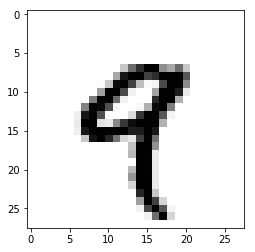

In [28]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## 2.2.6 Manipulating tensors in Numpy

In [30]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [0]:
my_slice = train_images[10:100, :, :]
my_slice.shape

In [32]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

It’s also possible to use negative indices. Much like negative indices in Python lists,
they indicate a position relative to the end of the current axis. In order to crop the
images to patches of 14 × 14 pixels centered in the middle, you do this:

In [33]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

## 2.2.7 The notion of data batches

In general, the first axis (axis 0, because indexing starts at 0) in all data tensors you’ll
come across in deep learning will be the samples axis (sometimes called the samples
dimension). 
-  In addition, deep-learning models don’t process an entire dataset at once; rather,
they break the data into small batches. Concretely, here’s one batch of our MNIST digits,
with batch size of 128:

In [34]:
batch = train_images[:128]
batch

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

And here’s the next batch:

In [0]:
batch = train_images[128:256]

And the nth batch:

batch = train_images[128 * n:128 * (n + 1)]

- <b>, the first axis (axis 0) is called the batch axis or
batch dimension. </b>

## 2.2.8 Real-world examples of data tensors

Let’s make data tensors more concrete with a few examples similar to what you’ll
encounter later. The data you’ll manipulate will almost always fall into one of the following
categories:
- <b>Vector data—2D</b> tensors of shape (samples, features)
- <b>Timeseries data</b> or sequence data—3D tensors of shape (samples, timesteps,
features)
- <b>Images—4D tensors</b> of shape (samples, height, width, channels) or (samples,
channels, height, width)
- <b>Video—5D tensors</b> of shape (samples, frames, height, width, channels) or
(samples, frames, channels, height, width)

## 2.2.9 Vector data

(that is, an array of
vectors), where the first axis is the samples axis and the second axis is the features axis.
 Let’s take a look at two examples:
-  person’s age, ZIP code,
and income.
    - 100,000 people can be stored in a 2D tensor of shape
(100000, 3)
- A dataset of text documents, where we represent each document by the counts
of how many times each word appears in it (out of a dictionary of 20,000 common
words). Each document can be encoded as a vector of 20,000 values (one
count per word in the dictionary), and thus an entire dataset of 500 documents
can be stored in a tensor of shape (500, 20000)

## 2.2.10 Timeseries data or sequence data

Each sample can be encoded as a
sequence of vectors (a 2D tensor), and thus a batch of data will be encoded as a 3D
tensor (see figure 2.3).<img src='images/f2.3.png'>

- The time axis is always the second axis (axis of index 1), by convention. Let’s look at a
few examples:

- Thus every minute is encoded as a 3D vector, an entire day of trading is
encoded as a 2D tensor of shape (390, 3) (there are 390 minutes in a trading
day), and 250 days’ worth of data can be stored in a 3D tensor of shape (250,
390, 3). Here, each sample would be one day’s worth of data.

- Then each tweet can be encoded
as a 2D tensor of shape (280, 128), and a dataset of 1 million tweets can be
stored in a tensor of shape (1000000, 280, 128).`

## 2.2.11 Image data
<img src='images/f2.4.png'>

In [36]:
# Create Dummy Data
image = np.random.randn(128, 256, 256, 3)
image

array([[[[-7.97625376e-01,  5.17658097e-01,  1.33360986e+00],
         [-1.52389431e+00,  2.29212812e+00,  1.69026758e-01],
         [ 2.20502336e-01, -1.13831769e+00,  1.44191534e+00],
         ...,
         [ 5.18354953e-01,  1.32870799e+00, -5.75498443e-01],
         [-3.82598877e-01,  2.41479828e-01,  3.55850954e-01],
         [-1.02485884e+00,  1.28064157e+00,  5.14953671e-01]],

        [[ 5.85526482e-02,  4.70672559e-01, -4.81680178e-01],
         [-2.29176594e+00,  2.03987454e+00, -6.08497763e-02],
         [-5.18978888e-01, -2.01840382e-01, -8.16541918e-01],
         ...,
         [ 6.53130864e-01, -1.26584623e+00, -1.49055169e+00],
         [ 7.51558869e-02, -1.43866590e+00, -4.77734513e-01],
         [ 8.68380210e-01,  3.16225792e-01, -4.39435053e-01]],

        [[-1.11061466e-01,  8.53029706e-01, -7.11282071e-01],
         [-4.95562162e-02,  9.01149864e-01,  1.57853253e+00],
         [-9.04644534e-01, -2.10990271e+00, -1.00675146e-01],
         ...,
         [ 3.49031298e-0

- height, width, and color depth.
- samples, width,height,chanel (TensorFlow)


In [0]:
data = np.random.randn(128, 256, 256, 3)
data[:1]

array([[[[ 8.74400898e-01, -9.90121448e-01, -1.76636264e-01],
         [-1.15917176e+00,  2.53954377e-01, -2.58889897e-01],
         [-2.05628335e-01, -7.43644848e-01, -6.59344659e-01],
         ...,
         [-8.73010106e-01,  1.55490340e-01,  5.18543093e-01],
         [ 5.59714364e-01,  1.31429862e+00,  5.59741026e-04],
         [ 2.22685952e+00,  7.12551490e-02,  4.63389747e-01]],

        [[ 9.51184166e-01, -2.72024644e+00, -5.49499661e-02],
         [ 1.84987802e+00, -1.88552181e+00,  7.93080859e-02],
         [-8.80184181e-01, -7.79511969e-01, -6.52347134e-01],
         ...,
         [ 2.04100987e+00, -4.51602178e-01, -1.72730234e+00],
         [ 7.15548576e-01, -6.36670700e-01,  5.93138764e-01],
         [ 9.08668442e-01,  6.80581650e-01,  8.67073730e-01]],

        [[ 9.36694692e-01, -5.56619285e-01,  1.71706682e+00],
         [-1.16186440e+00, -6.60247330e-01,  6.26163179e-01],
         [ 4.42788289e-01,  5.91328107e-01, -2.87284012e-01],
         ...,
         [-9.29765095e-0

## 2.2.12 Video data

- (samples, frames, height, width, color_depth)

# 2.3 The gears of neural networks: tensor operations

 In our initial example, we were building our network by stacking Dense layers on
top of each other. A Keras layer instance looks like this:

In [0]:
import keras
keras.layers.Dense(512, activation='relu')

In [0]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [0]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

So, in Numpy, you can do the following element-wise operation, and it will be blazing
fast:


import numpy as np
z=x+y
z = np.maximum(z, 0.)

# 2.3.2 Broadcasting

the smaller tensor will be broadcasted to
match the shape of the larger tensor.
- Axes (called broadcast axes) are added to the smaller tensor to match the ndim of
the larger tensor.
- Axes (called broadcast axes) are added to the smaller tensor to match the ndim of
the larger tensor.
    - `X shape (32,10) <br> y shape (10,)<br> (1,10)<br>(32, 10), where Y[i, :] == y for i in range(0, 32)

In [0]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [0]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)


The output z has shape
(64, 3, 32, 10) like x.

## 2.3.3 Tensor dot

The dot operation, also called a tensor product (not to be confused with an elementwise
product) is the most common

In [41]:
import numpy as np
x = np.random.randn(10)
y = np.random.randn(10)
z = np.dot(x, y)
print(x)
print(y,"In mathematical notation, you’d note the operation with a dot (.):")
z

[-1.15658615  0.68076689  0.01687951 -1.13046371  2.02489112  0.29680411
 -0.39463399 -0.57273265 -0.02674086  0.50120435]
[ 0.37059656 -0.77626328 -0.07474257 -1.71817935 -0.49937689 -1.17446747
 -0.98534498  0.39295525  0.47522854 -1.29587139] In mathematical notation, you’d note the operation with a dot (.):


-0.8741860745209995

In mathematical notation, you’d note the operation with a dot (.):

In [0]:
# z = x . y

def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z


In [0]:
import numpy as np
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

You could also reuse the code we wrote previously, which highlights the relationship
between a matrix-vector product and a vector product:

In [0]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [0]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

<img src='images/f2.5.png'>

More generally, you can take the dot product between higher-dimensional tensors,
following the same rules for shape compatibility as outlined earlier for the 2D case:
```
(a, b, c, d) . (d,) -> (a, b, c)
(a, b, c, d) . (d, e) -> (a, b, c, e)
```

## 2.3.4 Tensor reshaping

 preprocessed the digits data before feeding it into our network
```train_images = train_images.reshape((60000, 28 * 28)) ```

In [0]:
x = np.array([[0., 1.],
[2., 3.],
[4., 5.]])

In [47]:
 print(x.shape)

(3, 2)


In [48]:
x = x.reshape(1,6)
x

array([[0., 1., 2., 3., 4., 5.]])

In [49]:
x = x.reshape(6,1)
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [50]:
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

(20, 300)


## Geometric interpretation of tensor operations

For instance, let’s consider addition. We’ll start with the following
vector:
` A = [0.5, 1]`
<img src='images/f2.6.png'>

Let’s consider a new point, B = [1, 0.25],
 the resulting location
being the vector representing the sum of the previous two vectors (see figure 2.8).<img src='images/f2.8.png'>

In general, elementary geometric operations such as affine transformations, rotations,
scaling, and so on can be expressed as tensor operations. For instance, a rotation of a
2D vector by an angle theta can be achieved via a dot product with a 2 × 2 matrix
R = [u, v], where u and v are both vectors of the plane: u = [cos(theta),
sin(theta)] and v = [-sin(theta), cos(theta)]. 

## 2.3.6 A geometric interpretation of deep learning

<img src='images/f2.9.png'>
 Each layer in a deep network applies a transformation that
disentangles the data a little—and a deep stack of layers makes tractable an extremely
complicated disentanglement process. 

## 2.4 The engine of neural networks:<br>gradient-based optimization

This happens within what’s called a training loop, which works as follows. Repeat
these steps in a loop, as long as necessary:
1 Draw a batch of training samples x and corresponding targets y.
2 Run the network on x (a step called the forward pass) to obtain predictions y_pred.
3 Compute the loss of the network on the batch, a measure of the mismatch
between y_pred and y.
4 Update all weights of the network in a way that slightly reduces the loss on this
batch.

## 2.4.1 What’s a derivative?

```
f(x + epsilon_x) = y + epsilon_y
f(x + epsilon_x) = y + a * epsilon_x
```
Obviously, this linear approximation is valid only when x is close enough to p.
 The slope a is called the derivative of f in p. If a is negative, it means a small change
of x around p will result in a decrease of f(x) (as shown in figure 2.10); and if a is positive,
a small change in x will result in an increase of f(x). Further, the absolute value
of a (the magnitude of the derivative) tells you how quickly this increase or decrease
will happen.
<img src='images/f2.10.png'>
 If you’re trying to update x by a factor epsilon_x in order to minimize f(x), and
you know the derivative of f, then your job is done: the derivative completely
describes how f(x) evolves as you change x. If you want to reduce the value of f(x),
you just need to move x a little in the opposite direction from the derivative. 

## 2.4.2 Derivative of a tensor operation: the gradient

 Consider an input vector x, a matrix W, a target y, and a loss function loss. You can
use W to compute a target candidate y_pred, and compute the loss, or mismatch,
between the target candidate y_pred and the target y:
<br>`y_pred = dot(W, x)`<br>
`loss_value = loss(y_pred, y)`<br>
If the data inputs x and y are frozen, then this can be interpreted as a function mapping
values of W to loss values:<br>
`loss_value = f(W)`

## 2.4.3 Stochastic gradient descent

1. Draw a batch of training samples x and corresponding targets y.
2. Run the network on x to obtain predictions y_pred.
3. Compute the loss of the network on the batch, a measure of the mismatch
between y_pred and y.
4. Compute the gradient of the loss with regard to the network’s parameters (a
backward pass).
5. Move the parameters a little in the opposite direction from the gradient—for
example W -= step * gradient—thus reducing the loss on the batch a bit.
<img src='images/f2.11.png'>
<img src='images/f2.12.png'>
<img src='images/f2.13.png'>

past_velocity = 0.
momentum = 0.1
while loss > 0.01:
    w, loss, gradient = get_current_parameters()
    velocity = past_velocity * momentum + learning_rate * gradient
    w=w+ momentum * velocity - learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)

## 2.4.4 Chaining derivatives: the Backpropagation algorithm

three tensor operations,
a, b, and c, with weight matrices W1, W2, and W3:
`f(W1, W2, W3) = a(W1, b(W2, c(W3)))`
Calculus tells us that such a chain of functions can be derived using the following identity,
called the chain rule: `f(g(x)) = f'(g(x)) * g'(x)`. Applying the chain rule to the
computation of the gradient values of a neural network gives rise to an algorithm
called Backpropagation (also sometimes called reverse-mode differentiation). Backpropagation
starts with the final loss value and works backward from the top layers to the bottom
layers, applying the chain rule to compute the contribution that each parameter
had in the loss value.

## 2.5 Looking back at our first example

You’ve reached the end of this chapter, and you should now have a general understanding
of what’s going on behind the scenes in a neural network. Let’s go back to
the first example and review each piece of it in the light of what you’ve learned in the
previous three sections.
 This was the input data:


In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Now you understand that the input images are stored in Numpy tensors, which are
here formatted as float32 tensors of shape (60000, 784) (training data) and (10000,
784) (test data), respectively.
 This was our network:

In [0]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Now you understand that this network consists of a chain of two Dense layers, that
each layer applies a few simple tensor operations to the input data, and that these
operations involve weight tensors. Weight tensors, which are attributes of the layers,
are where the knowledge of the network persists.
 This was the network-compilation step:


In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [55]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)
#train_images.shape
#train_labels.shape

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.2557 - acc: 0.9264
Epoch 2/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.1038 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.0686 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.0498 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0369 - acc: 0.9891


# Chapter summary
1. Learning means finding a combination of model parameters that minimizes
a loss function for a given set of training data samples and their corresponding
targets.
2. Learning happens by drawing random batches of data samples and their
targets, and computing the gradient of the network parameters with
respect to the loss on the batch. The network parameters are then moved
a bit (the magnitude of the move is defined by the learning rate) in the
opposite direction from the gradient.
3. The entire learning process is made possible by the fact that neural networks
are chains of differentiable tensor operations, and thus it’s possible
to apply the chain rule of derivation to find the gradient function mapping
the current parameters and current batch of data to a gradient value.
4. Two key concepts you’ll see frequently in future chapters are loss and optimizers.
These are the two things you need to define before you begin feeding
data into a network.
5. The loss is the quantity you’ll attempt to minimize during training, so it
should represent a measure of success for the task you’re trying to solve.
6. The optimizer specifies the exact way in which the gradient of the loss will
be used to update parameters: for instance, it could be the RMSProp optimizer,
SGD with momentum, and so on.